## 1. Introduction


### 1.1 Context

Stroke is a significant global health concern and the second leading cause of death worldwide, accounting for approximately 11% of all fatalities, as reported by the World Health Organization (WHO). It occurs when blood flow to the brain is disrupted, leading to the sudden death of brain cells. The two main types of stroke are ischemic, caused by a blockage in a blood vessel supplying the brain, and hemorrhagic, resulting from a ruptured blood vessel. Strokes can have severe consequences, such as paralysis, speech difficulties, and cognitive impairments, and prompt medical intervention is crucial to minimize long-term effects and increase chances of recovery.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### 1.2 Aims

The analysis aims to gain insights and make accurate predictions related to strokes. By analyzing relevant data and employing suitable predictive models, our goal is to identify risk factors, understand patterns, and develop reliable predictions for stroke occurrences.

### 1.3 Data features

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

* Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### 1.4 Pre-requsites

#### 1.4.1 Libraries

For this project we would be making use of several libraries, the first set being the usual libraries, Numpy,Pandas for manipulating data and seaborn and Matplotlib for visualization. Then we would be importing several libraries from sklearn for prediction. Some of the basic ones we would be using are:
* The several classifiers model: 
    RandomForest classifier,
    KNeighborsClassifier,
    DecisionTree classifier,
    AdaBooStClassifier,
    XGBClassifier,

* Several metrics
    Precision_score,
    Recall_score,
    Accuracy_score,
    Roc_auc_score,
    Confusion Matrix.
  
  NB: Any model not stated in the original library importation field would be explained as we go

In [1]:
#Importing important libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# DS Division.
from sklearn.model_selection import train_test_split


# Classifier Models.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Evaluation Metrics.
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import confusion_matrix

# Search Hyperparameters for model tuning
from sklearn.model_selection import GridSearchCV

# Save Models.
from joblib import dump, load

# Warnings.
import warnings
warnings.filterwarnings("ignore")

## 2  Data Wrangling

Here we would be looking at the following:
* loading the data.
* Examining the dataframe structure.
* Handling missing values.
* Exploring the statistics of the data.


### 2.1 Loading Data

In [2]:
# Reading the data
df= pd.read_csv('healthcare-dataset-stroke-data.csv')

# Viewing the top rows of the data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 2.2 Describing the Data

#### 2.2.1 Dataframe structure

In [3]:
# Getting the basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Observation:
* The data has no null valuses
* There are a total of three(3) float data types, four(4) int64 data types and five(5) object data types.
* There are total of twelve(12) columns and a total of 5110 rows

#### 2.2.2 Missing value evaluation

In [4]:
# Searching for missting values in the dataframe
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Observation:
* There are over 201 missing values in the BMI column.

#### Handling missing values:
To fill the missing values we would be using the median value of the bmi column. This is because there are outliers present in the bmi distribution which would affect the mean value.

In [5]:
#Getting the median values
bmi_median = df['bmi'].median()

#Filling the missing values with the median values
df['bmi'] =  df['bmi'].fillna(bmi_median)

#Displaying a confirmation
print('The bmi Median is',bmi_median)
print('Total N/A in bmi after fill is',df['bmi'].isna().sum())

The bmi Median is 28.1
Total N/A in bmi after fill is 0


#### 2.2.3 Descriptive statistics of the data

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


#### Observation:
* The oldest patient is 82 years old. Also, 50% of the patients are 45 years old, and the average age is 43 years
* The highest BMI is 97.60 and the lowest is 10.30
* The highest glucose level is 271.74 and the lowest glucose level is 55.12

The age column seems to be formatted wrongly, as it is a float data types. Peoples age are usualy have no fractions, as we can observe that the minimum age in this data set is 0.08. To fix this, we convert the age data type to integer, and also round it up to a whole number.

In [7]:
# Changing the age data type to integer
df['age']= df['age'].astype('int64').round()

# Displaying the data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 3 EDA Analysis

In the EDA analysis we would be looking at the following details:
* Univirate analysis
    * Analysing the object variables
    * Analysing the numerical variables
* Bivirate analysis
    * Comparing relationship between object variables and stroke
    * Comparing relationship between numerical variables and stroke
* Multvirate analysis

### 3.1 Univirate analysis

#### 3.1.1 Analysing the object variables


In [8]:
#Checking all th unique value in the object columns
Object_columns = df.select_dtypes(include=['object'])

#Looping through the object colums to get the unique values, and their counts
for i in Object_columns:
    values_count= df[i].nunique()
    total = df[i].value_counts()
    count = (df[i].value_counts() / len(df) * 100).round()
    
    # Displaying the results
    print('\033[1m' + i + '\033[0m')  # Print 'i' in bold
    print('Category of',i,'=',(values_count))
    print('Percentage of each category')
    print(count)
    print('*'*(50))
    print()

gender
Category of gender = 3
Percentage of each category
Female    59.0
Male      41.0
Other      0.0
Name: gender, dtype: float64
**************************************************

ever_married
Category of ever_married = 2
Percentage of each category
Yes    66.0
No     34.0
Name: ever_married, dtype: float64
**************************************************

work_type
Category of work_type = 5
Percentage of each category
Private          57.0
Self-employed    16.0
children         13.0
Govt_job         13.0
Never_worked      0.0
Name: work_type, dtype: float64
**************************************************

Residence_type
Category of Residence_type = 2
Percentage of each category
Urban    51.0
Rural    49.0
Name: Residence_type, dtype: float64
**************************************************

smoking_status
Category of smoking_status = 4
Percentage of each category
never smoked       37.0
Unknown            30.0
formerly smoked    17.0
smokes             15.0
Name: smoking_st

#### Visualizing the categorical data distribution

(0.0, 1.0, 0.0, 1.0)

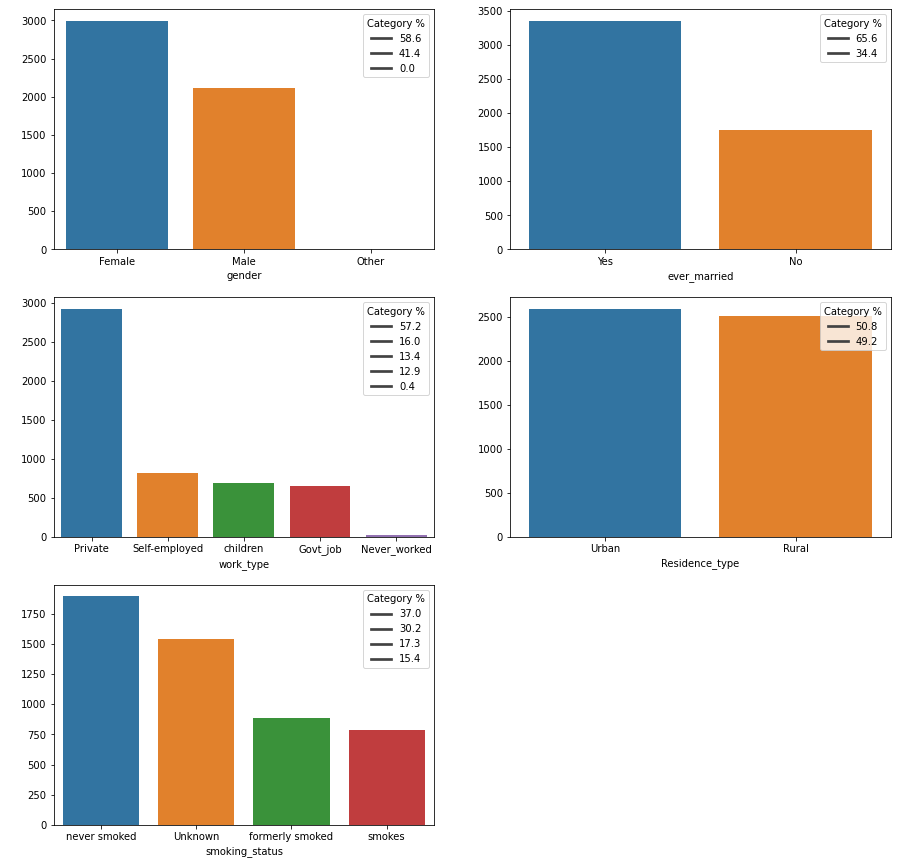

In [9]:
#Ploting a graph to show the distriburion of each of the object variables
Object_columns = df.select_dtypes(include=['object'])

# Plotting a graph
fig, axarr = plt.subplots(3,2, figsize = (15, 15))
n=0
for j in Object_columns:
    ax = axarr[n // 2, n % 2]
    sns.barplot(x=df[j].value_counts().index, y=df[j].value_counts(), ax= ax)
    ax.legend([((x/len(df)*100).round(1)) for x in df[j].value_counts().values], title='Category %')
    ax.set_xlabel(j)
    ax.set_ylabel(" ")
    n += 1

#Creating an empty plot
axarr[2,1].axis('off')   
  

#### Observations:
* There are more Females(58.6%) than males(41.4%) in the data set
* The data contains more married people (65.6%), than non-married people(34.4%)
* Majority of the patients (57.2%) work in the private sector
* The number of the patients living in rural and urban areas are almost evenly distributed
* More percent of the patients(37%) have never smoked. Only 15.4% of the patients currenly smokes


#### 3.1.2 Analysing the numerical variables

In [10]:
#A library to help us tabluate the results
from tabulate import tabulate

Numerical_columns = ['hypertension','heart_disease','stroke']
table_data = []
for j in Numerical_columns:
    values_count = df[j].value_counts().rename({0: 'No', 1: 'Yes'})
    count = (df[j].value_counts() / len(df) * 100).round().rename({0: 'No', 1: 'Yes'})
    row = [j, values_count, count]
    table_data.append(row)

headers = ["Column", "Category Count", "Percentage"]

table = tabulate(table_data, headers, tablefmt="fancy_grid")
print (table)

╒═══════════════╤═══════════════════════════════════╤═════════════════════════════════════╕
│ Column        │ Category Count                    │ Percentage                          │
╞═══════════════╪═══════════════════════════════════╪═════════════════════════════════════╡
│ hypertension  │ No     4612                       │ No     90.0                         │
│               │ Yes     498                       │ Yes    10.0                         │
│               │ Name: hypertension, dtype: int64  │ Name: hypertension, dtype: float64  │
├───────────────┼───────────────────────────────────┼─────────────────────────────────────┤
│ heart_disease │ No     4834                       │ No     95.0                         │
│               │ Yes     276                       │ Yes     5.0                         │
│               │ Name: heart_disease, dtype: int64 │ Name: heart_disease, dtype: float64 │
├───────────────┼───────────────────────────────────┼───────────────────────────

#### Observations:
* Majority of the patients do not have any prevailing ailment.
* We have data with a high level of imbalance, 95% of patients have not had a stroke, only 5% of patients in the entire dataset have had a stroke. We might need more data.

#### Distribution of the numerical variables

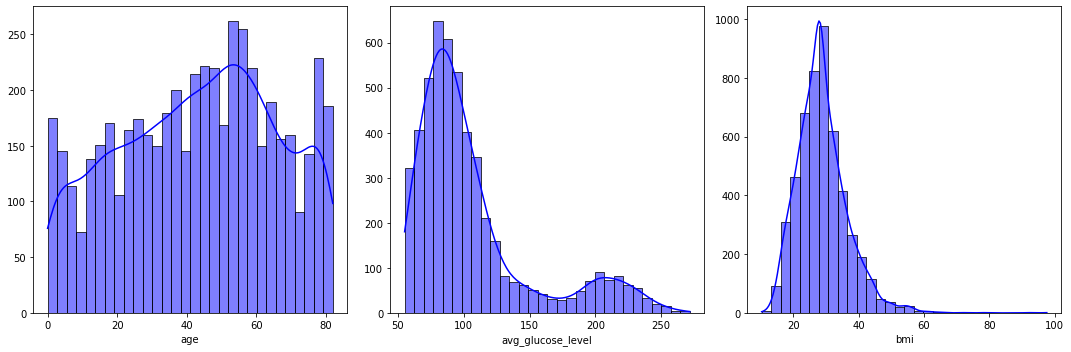

In [11]:
# Analysing numerical features
Numerical_columns = ['age','avg_glucose_level','bmi']
fig, axarr = plt.subplots(1, 3, figsize=(15, 5))
n = 0

# Looping throught the columns
for j in Numerical_columns:
    ax = axarr[n]
    sns.histplot(x=df[j], bins=30, kde=True, color='blue', ax=ax)
    ax.set_xlabel(j)
    ax.set_ylabel("")
    n += 1

    
plt.tight_layout()
plt.show()

#### Observations:
* The "Age" Feature has a symentric distribution.
* The Features "AVG Glucose Level" and "BMI" have a right-skewed distribution.


### 3.2 Bivirate Analysis

#### 3.2.1 Correlating Stroke Incidence with Patient Marital status

In [12]:
#Bivariate analysis
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


,gender,ever_married,stroke,count
0,Female,No,Stable,972
1,Female,No,Has stroke,21
2,Female,Yes,Stable,1881
3,Female,Yes,Has stroke,120
4,Male,No,Stable,755
5,Male,No,Has stroke,8
6,Male,Yes,Stable,1252
7,Male,Yes,Has stroke,100
8,Other,No,Stable,1


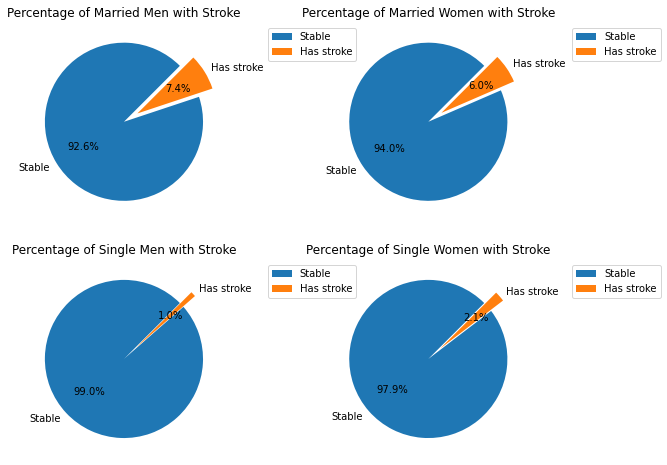

In [13]:
#Grouping the data by Gender and Marital status
married= df.groupby(['gender','ever_married'])['stroke'].value_counts().rename({0: 'Stable', 1: 'Has stroke'}).reset_index(name='count')


# Seperating Just married men
married_male = married[(married['ever_married'] == 'Yes') & (married['gender'] == 'Male')]

# Seperating Just single men
single_male = married[(married['ever_married'] == 'No') & (married['gender'] == 'Male')]

# Seperating Just married women
married_female = married[(married['ever_married'] == 'Yes') & (married['gender'] == 'Female')]

# Seperating Just single women
single_female = married[(married['ever_married'] == 'No') & (married['gender'] == 'Female')]


# Create a 2x2 subplot matrix
ig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Data for pie charts
data = [married_male, married_female, single_male, single_female]
titles = ['Percentage of Married Men with Stroke', 'Percentage of Married Women with Stroke',
          'Percentage of Single Men with Stroke', 'Percentage of Single Women with Stroke']

# Loop through the data and titles to plot pie charts
for i, (d, title) in enumerate(zip(data, titles)):
    ax = axs[i // 2, i % 2]  # Get the appropriate subplot
    ax.pie(d['count'], labels=d['stroke'], autopct='%1.1f%%', startangle=45, explode = (0,0.2))
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.7, 1))
    
married

#### Observations:
* 7.4% of married men in the dataset has stroke, and 6% of the married women has stroke
* Only 1% of the single men has stroke, while 2.1% of single women has stroke
* Married women have the highest number of stroke patients in the dataset,(120)
* Overall, more married patients have stroke compared to single people


#### 3.2.2 Correlating Stroke Incidence with Patient Work Type

,work_type,stroke,count
0,Govt_job,Stable,624
1,Govt_job,Has stroke,33
2,Never_worked,Stable,22
3,Private,Stable,2776
4,Private,Has stroke,149
5,Self-employed,Stable,754
6,Self-employed,Has stroke,65
7,children,Stable,685
8,children,Has stroke,2


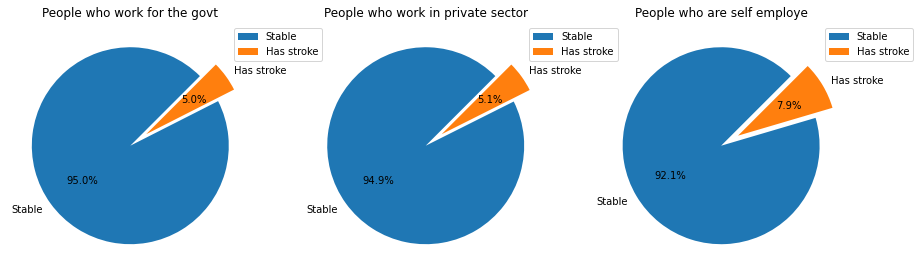

In [14]:
#Grouping the data by work type
work= df.groupby(['work_type'])['stroke'].value_counts().rename({0: 'Stable', 1: 'Has stroke'}).reset_index(name='count')

# Seperating people who work in Govt jobs
Govt_job = work[work['work_type'] == 'Govt_job']

# Seperating people who work in Private sector
Private_sector = work[work['work_type'] == 'Private']

# Seperating people who are self employed
Self_employed = work[work['work_type'] == 'Self-employed']

# Create a 1x3 subplot matrix
ig, axs = plt.subplots(1, 3, figsize=(15, 8))

# Data for pie charts
data = [Govt_job, Private_sector, Self_employed]
titles = ['People who work for the govt', 'People who work in private sector',
          'People who are self employe']

# Loop through the data and titles to plot pie charts
for j, (data, title) in enumerate(zip(data, titles)):
    ax = axs[j // 1]  # Get the appropriate subplot
    ax.pie(data['count'], labels=data['stroke'], autopct='%1.1f%%', startangle=45, explode = (0,0.2))
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.3, 1),loc='upper right')

work


#### Observations:
* 7.9% of people who are self-employed have stroke, which is a higher percentage than those who work for the governmrnt and in private sectot
* Overall, those work in private sector have the highest number of people with stroke(149), followed by those who are self-employed(65).


#### 3.2.3 Correlating Stroke Incidence with Patient smoking status

,smoking_status,stroke,count
2,formerly smoked,Stable,815
3,formerly smoked,Has stroke,70
4,never smoked,Stable,1802
5,never smoked,Has stroke,90
6,smokes,Stable,747
7,smokes,Has stroke,42


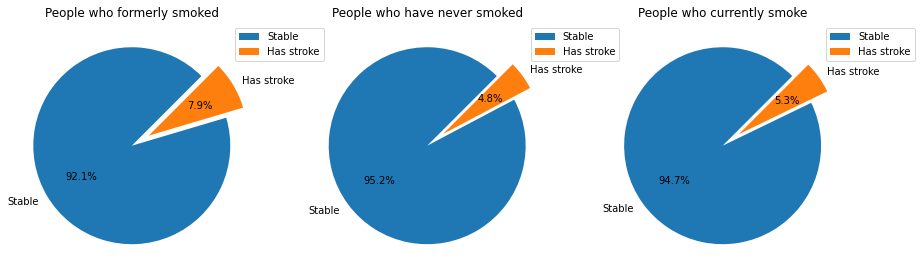

In [15]:
#Grouping the data by smoking status
Smoker_status= df.groupby(['smoking_status'])['stroke'].value_counts().rename({0: 'Stable', 1: 'Has stroke'}).reset_index(name='count')

# Taking out unknown status
Smoker_status = Smoker_status[Smoker_status['smoking_status'] != 'Unknown']

#Seperating people who have smoked before in their lifetime
Formerly_smoked = Smoker_status[Smoker_status['smoking_status'] == 'formerly smoked']

#Seperating people who have never smoked before in their lifetimw
never_smoked = Smoker_status[Smoker_status['smoking_status'] == 'never smoked']

#Seperating people who smokes
smokes=Smoker_status[Smoker_status['smoking_status'] == 'smokes']

# Create a 1x3 subplot matrix
ig, axs = plt.subplots(1, 3, figsize=(15, 10))

# Data for pie charts
data = [Formerly_smoked, never_smoked, smokes]
titles = ['People who formerly smoked', 'People who have never smoked',
          'People who currently smoke']

# Loop through the data and titles to plot pie charts
for j, (d, title) in enumerate(zip(data, titles)):
    ax = axs[j // 1]  # Get the appropriate subplot
    ax.pie(d['count'], labels=d['stroke'], autopct='%1.1f%%', startangle=45, explode = (0,0.2))
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.3, 1),loc='upper right')

Smoker_status

#### Observations:
* 7.9% of those who have formely smoked has stroke, which is a bigger percentage compared to tge rest of the categories.
* Those who have never smoked has the lowest percentage of people who has stroke.
* Overall, the datasets shows that people who have never smoked has the highest number of people with stroke(129), compared to the rest of the categories. Quite interesting.


#### 3.2.4 Correlating Stroke Incidence with prevailing illness

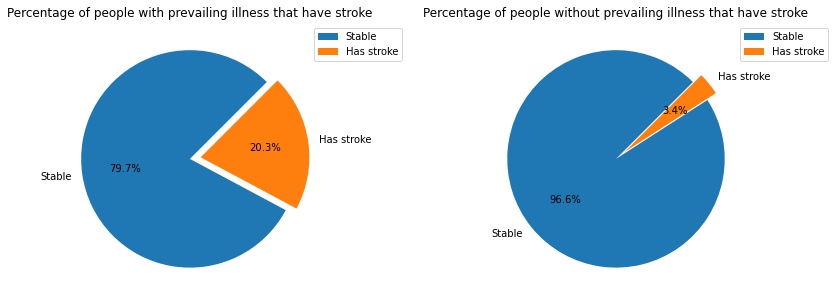

In [16]:
# grouping the data by people who have hypertension and heart diseases
Previous_illness = df.groupby(['hypertension','heart_disease'])['stroke'].value_counts().rename({0: 'Stable', 1: 'Has stroke'}).reset_index(name='count')

# Selecting people who have both prevailing condictions
Prevailing_condiction= Previous_illness[(Previous_illness['hypertension'] == 'Has stroke') & (Previous_illness['heart_disease'] == 'Has stroke')]

# Selecting people without prevailing condictions
Not_sick = Sick_people = Previous_illness[(Previous_illness['hypertension'] == 'Stable') & (Previous_illness['heart_disease'] == 'Stable')]

# Create a 1x2 subplot matrix
ig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Data for pie charts
data = [Prevailing_condiction, Not_sick]
titles = ['Percentage of people with prevailing illness that have stroke', 'Percentage of people without prevailing illness that have stroke']

# Loop through the data and titles to plot pie charts
for j, (d, title) in enumerate(zip(data, titles)):
    ax = axs[j // 1]  # Get the appropriate subplot
    ax.pie(d['count'], labels=d['stroke'], autopct='%1.1f%%', startangle=45, explode = (0,0.1))
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.3, 1),loc='upper right')

#### Observations:
* Only 3.4% of patients without these illness has stroke, while 20.3% of patients with hypertension and heart diseases have stroke.  


#### 3.2.5 Correlatiing Stroke Incidence with BMI

In [17]:
#Grouping BMI into categories

# First create a copy
df_cat= df.copy()

# DF of Patients categorized by their BMI
df_cat['bmi']= pd.cut(df_cat['bmi'], bins=[0, 18.5, 24.9, 29.9, np.inf], include_lowest=True,
                            labels=["Below Average", "Normal", "Above Average", "Obesity"])

BMI = df_cat['bmi'].value_counts()
BMI

Obesity          1920
Above Average    1610
Normal           1231
Below Average     349
Name: bmi, dtype: int64

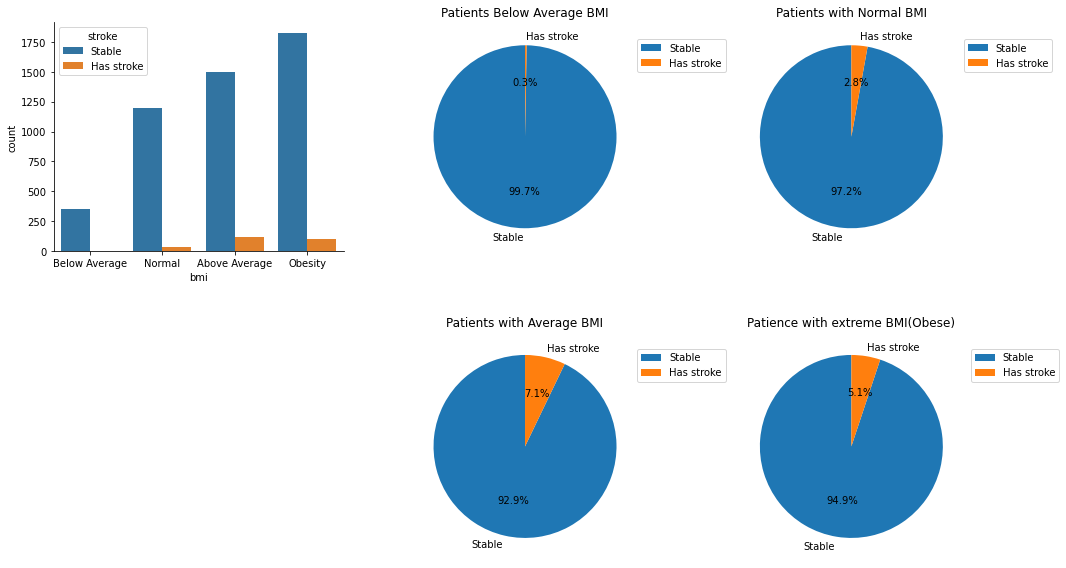

Number of patients in the various BMI categores:
Obesity          1920
Above Average    1610
Normal           1231
Below Average     349
Name: bmi, dtype: int64


,bmi,stroke,count
0,Below Average,Stable,348
1,Below Average,Has stroke,1
2,Normal,Stable,1196
3,Normal,Has stroke,35
4,Above Average,Stable,1495
5,Above Average,Has stroke,115
6,Obesity,Stable,1822
7,Obesity,Has stroke,98


In [18]:
# grouping the data by BMI of individual with stroke
Body_max = df_cat.groupby(['bmi'])['stroke'].value_counts().rename({0: 'Stable', 1: 'Has stroke'}).reset_index(name='count')

# Isolating the patients whose body max are below the average range
Below_average= Body_max[Body_max['bmi']== 'Below Average']

#Isolating the patients whose body max within the Normal range
Normal_bmi= Body_max[Body_max['bmi']== 'Normal']

#Isolating the patients whose body max are above the average range
Average_bmi = Body_max[Body_max['bmi']=='Above Average']

#Isolating patients within the extreme body weight range
Obese_bmi = Body_max[Body_max['bmi']== 'Obesity']

# Visualizing the data 
fig, axs = plt.subplots(2, 3, figsize=(15, 8)) #Create a 2x3 subplot matrix

# Plot 1: Distrbution of all body weights (Bar chart)
sns.barplot(x = 'bmi', y='count', data = Body_max, hue='stroke', ax = axs[0,0])
sns.despine() # Removing Gridlines


# Plot 2: Visualizing patients whose body weight fall below average range (Pie chart)
axs[0, 1].pie(Below_average['count'], labels=Below_average['stroke'], autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Patients Below Average BMI')
axs[0, 1].legend(bbox_to_anchor=(1.4, 0.95))

# Plot 3: Visualizing patients whose body weight are within the normal range (Pie chart)
axs[0, 2].pie(Normal_bmi['count'], labels= Normal_bmi['stroke'], autopct='%1.1f%%', startangle=90)
axs[0, 2].set_title('Patients with Normal BMI')
axs[0, 2].legend(bbox_to_anchor=(1.4, 0.95))

# Empty plot
axs[1,0].axis('off')

# Plot 4: Visualizing patients whose body weight are within the average range (pie chart)
axs[1, 1].pie(Average_bmi['count'], labels= Normal_bmi['stroke'],autopct='%1.1f%%', startangle=90 )
axs[1, 1].set_title('Patients with Average BMI')
axs[1, 1].legend(bbox_to_anchor=(1.4, 0.95))


# Plot 5: Visuializing patients within the extreme body range  (pie chart)
axs[1, 2].pie(Obese_bmi['count'], labels= Obese_bmi['stroke'],autopct='%1.1f%%', startangle=90 )
axs[1, 2].set_title('Patience with extreme BMI(Obese)')
axs[1, 2].legend(bbox_to_anchor=(1, 0.95))

# Adjust the layout and display the plot
plt.tight_layout(h_pad= 5)
plt.show()

print('\033[1mNumber of patients in the various BMI categores:\033[0m')
print(BMI)
Body_max

#### Observations:
* There are more patients above the normal body weight index in the dataset.
* Patients above the average bmi have more percentage of people with stroke(7.1%), followed by the obesed patients(5.1%).
* Only 0.3% of the patients below the average bmi has stroke.

#### 3.2.6 Correlatiing Stroke Incidence with Glucose Level

In [19]:
# Dividing the Glucose level into catgeories
df_cat['avg_glucose_level'] = pd.cut(df_cat['avg_glucose_level'], bins=[0, 70, 140, np.inf], include_lowest=True,
                                          labels=['Low Level', 'Normal Level', 'High Level'])

Glucose = df_cat['avg_glucose_level'].value_counts()
Glucose

Normal Level    3533
High Level       821
Low Level        756
Name: avg_glucose_level, dtype: int64

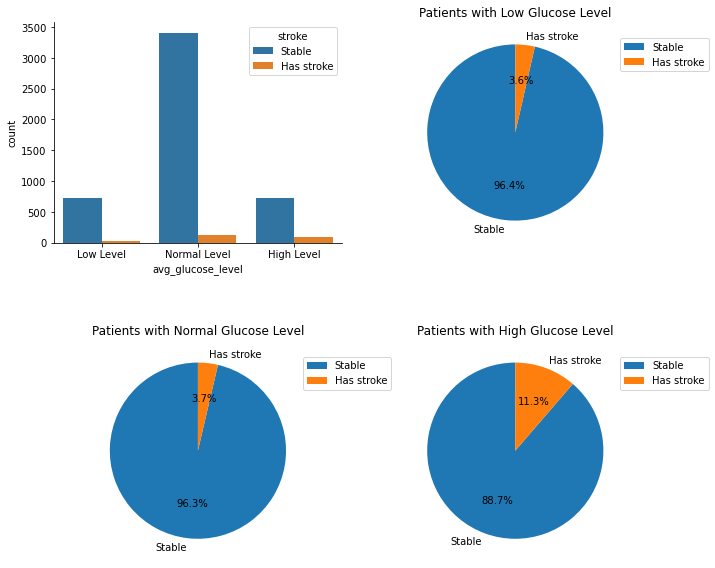

Number of patients in the various Glucose level categories:
Normal Level    3533
High Level       821
Low Level        756
Name: avg_glucose_level, dtype: int64


,avg_glucose_level,stroke,count
0,Low Level,Stable,729
1,Low Level,Has stroke,27
2,Normal Level,Stable,3404
3,Normal Level,Has stroke,129
4,High Level,Stable,728
5,High Level,Has stroke,93


In [20]:
# grouping the data by BMI of individual with stroke
Glucose_level = df_cat.groupby(['avg_glucose_level'])['stroke'].value_counts().rename({0: 'Stable', 1: 'Has stroke'}).reset_index(name='count')

# Isolating patients whose glucose level falls within the low range
Low_level = Glucose_level[Glucose_level['avg_glucose_level']== 'Low Level']

# Isolating patients whose glucose level are within the normal range
Normal_level = Glucose_level[Glucose_level['avg_glucose_level']== 'Normal Level']

# Isolating patients whose glucose level are within the high level range
High_level = Glucose_level[Glucose_level['avg_glucose_level'] == 'High Level']

# Visualizing the data 
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) #Create a 2x3 subplot matrix

# Plot 1: Distrbution of all body weights (Bar chart)
sns.barplot(x = 'avg_glucose_level', y='count', data = Glucose_level, hue='stroke', ax = axs[0,0])
sns.despine()


# Plot 2: Visualizing patients whose body weight fall below average range (Pie chart)
axs[0, 1].pie(Low_level['count'], labels=Low_level['stroke'], autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Patients with Low Glucose Level')
axs[0, 1].legend(bbox_to_anchor=(1.4, 0.95))

# Plot 3: Visualizing patients whose body weight are within the normal range (Pie chart)
axs[1, 0].pie(Normal_level['count'], labels= Normal_level['stroke'], autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('Patients with Normal Glucose Level')
axs[1, 0].legend(bbox_to_anchor=(1.4, 0.95))

# Plot 4: Visualizing patients whose body weight are within the average range (pie chart)
axs[1, 1].pie(High_level['count'], labels= High_level['stroke'],autopct='%1.1f%%', startangle=90 )
axs[1, 1].set_title('Patients with High Glucose Level')
axs[1, 1].legend(bbox_to_anchor=(1.4, 0.95))


# Adjust the layout and display the plot
plt.tight_layout(h_pad= 5)
plt.show()

print('\033[1mNumber of patients in the various Glucose level categories:\033[0m')
print(Glucose)
Glucose_level

#### Observation:
* There are more patients with the Normal level of glucose than any other category in the dataset
* 11.3% of the patients with high glucose level has stroke, making it the category with the most percentage with stroke.
* Patients with low glucose level has a slighlty lower percentage of people who has stroke(3.6%), relative those with normal glucose lever(3.7%)
* The most number of people with stroke in the dataset(129) have a normal level of glucose,this could be because there are more patients with the normal glucose level in the dataset.

#### 3.2.7 Correlatiing Stroke Incidence with Age

In [21]:
#Dividing the age range into categories
df_cat['age_ranges'] = pd.cut(df_cat['age'], bins=[0, 46, 65, np.inf], include_lowest=True,
                             labels=["Youth", "Adulthood", "Old Age"])

Age = df_cat['age_ranges'].value_counts()

Number of Patients in the different age range:
Youth        2680
Adulthood    1465
Old Age       965
Name: age_ranges, dtype: int64


,age_ranges,stroke,count
0,Youth,Stable,2666
1,Youth,Has stroke,14
2,Adulthood,Stable,1386
3,Adulthood,Has stroke,79
4,Old Age,Stable,809
5,Old Age,Has stroke,156


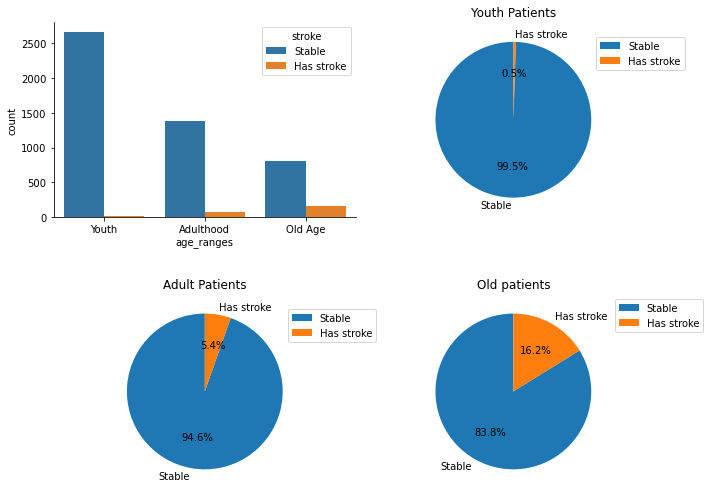

In [22]:
# grouping the data by Age of individual with stroke
Age_range = df_cat.groupby(['age_ranges'])['stroke'].value_counts().rename({0: 'Stable', 1: 'Has stroke'}).reset_index(name='count')

# Isolating patients within the youth age range
Youth = Age_range[Age_range['age_ranges']== 'Youth']

# Isolating patients within the adulthood age range
Adulthood = Age_range[Age_range['age_ranges']== 'Adulthood' ]

# Isolating patients within the old age range
Old_age = Age_range[Age_range['age_ranges'] == 'Old Age']

# Visualizing the data 
fig, axs = plt.subplots(2, 2, figsize=(10 , 7))

# 1. Visualizing the distribution of the age group
sns.barplot(x = 'age_ranges', y= 'count', data = Age_range, hue ='stroke', ax= axs[0,0])
sns.despine()

# 2. Visualing the youth distribution
axs[0,1].pie(Youth['count'], labels = Youth['stroke'], autopct = '%1.1f%%', startangle=90)
axs[0,1].set_title('Youth Patients')
axs[0,1].legend(bbox_to_anchor=(0.9, 0.95))

# 3. Visualizing patients within the Adulthood age range
axs[1,0].pie(Adulthood['count'], labels= Adulthood['stroke'], autopct ='%1.1f%%', startangle = 90)
axs[1,0].set_title('Adult Patients')
axs[1,0].legend(bbox_to_anchor=(0.9, 0.95))

# 4. Visualizing patients within the Old age range
axs[1,1].pie(Old_age['count'], labels= Old_age['stroke'], autopct = '%1.1f%%', startangle = 90)
axs[1,1].set_title('Old patients')
axs[1,1].legend(bbox_to_anchor=(1.5, 1))

plt.tight_layout(h_pad=3)
plt.show

print('\033[1mNumber of Patients in the different age range:\033[0m')
print(Age)
Age_range

#### Observation:
* Over 50% of the patients in the data set are in their youths.
* The older people tend to have more percentage of people with stroke, with the old patients at 16.2%, andthet adult patients at 5.4%.
* Only 0.5% of the youths have stroke.
* The datasets shows that the most number of people with stroke(156) are in their old ages.


### 3.3 Multi-virate Analysis

#### Ploting a Corelation Map to Analyze the Relationship Between the Numerical variables

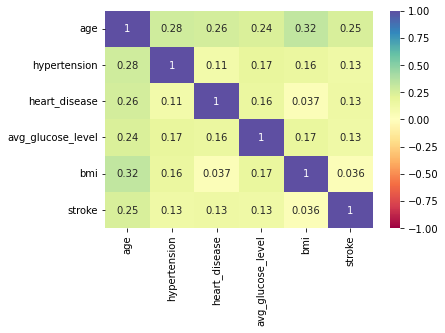

In [23]:
# Listing out the numerical variables
df_corr= df[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]

# Plotting a heatmap with seaborn to show the correlation between numeric variables
sns.heatmap(df_corr.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);

**To get a clearer image, we would isolate the relationship of every varibale to stroke**

<AxesSubplot:>

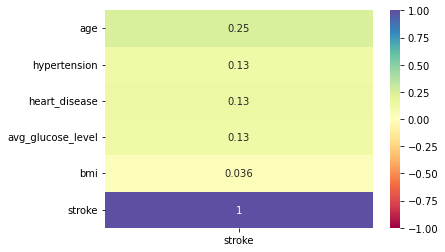

In [24]:
# Calculating the correlation matrix
corr_matrix = df_corr.corr()

# Plotting a heatmap to visualize the correlation
sns.heatmap(corr_matrix[['stroke']], annot=True, cmap='Spectral', vmin=-1, vmax=1)

* we can observe that age has a higher corelation with stroke, with a correlation of 0.25


## 4.0 Data Modeling

Now we are done with the EDA section of our analysis, we move to data modeling. In this session of our analysis, we delve into the process of creating a structured representation of the data to gain deeper insights and make.informed decisions. Through this session, we will explore various data modeling approaches to better understand and leverage the power of our data in driving actionable outcomes.

For this analysis we will be using three classifier algorithms to train our dataset and make predictions.
* RandomForestClassifier
* DecisionTreeClassifier
* KNeighborsClassifier
* AdaBoostClassifier
* XGBClassifier

To evaluate our model we would use the following metrics
* DecisionTree
* Accuracy score
* Precision score
* Recall score
* F1 score
* ROC_AUC_score

Here, we would concentrate on the F1 score and the Recall score as we are most interested in the true positives. Given the significance of this analysis, our priority lies in correctly identifying true positive cases of stroke, even at the risk of making some false positive identifications. The consequence of missing a stroke case is potentially more severe than incorrectly classifying a non-stroke case. Therefore, we prioritize the Recall score, which measures the proportion of actual stroke cases correctly identified, along with the F1 score, which considers both precision and recall to provide a balanced evaluation of our model's performance.


### 4.1 Preprocessing

Here is the list of things we would be looking at in this segment:
* Creating a copy of the dataset for our modeling.
* Droping unimportant column(the ID column).
* Dealing with outliers.
* Encoding the categorical variables so that they fit into our model.
* Spliting the dataset into dependent and independent variables.
* Dividing each variables into train and test sets


#### 4.1.1 Creating a copy of the data frame

In [25]:
# creating a copy of our dataframe, for modeling
df_model = df.copy()

#### 4.1.2 Dropping the ID column

In [26]:
# Dropping the id column
df_model = df.drop(['id'], axis='columns')
df_model.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### 4.1.3 Dealing with Ouliers

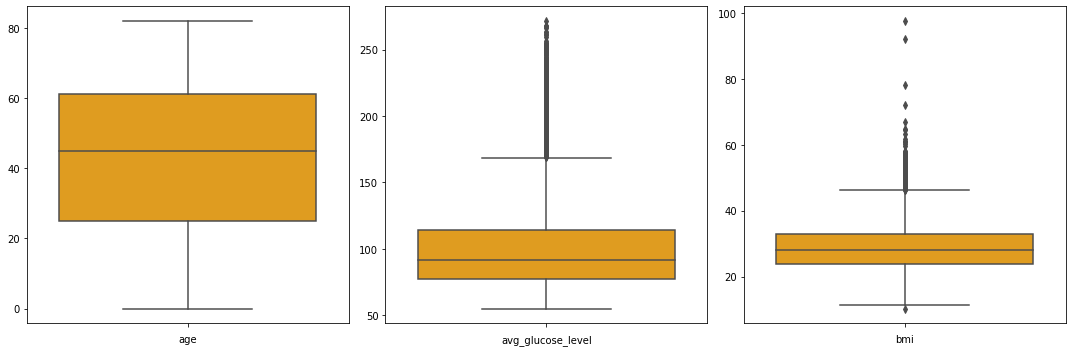

In [27]:
# Analysing numerical features to check of outliers
Numerical_columns = ['age','avg_glucose_level','bmi']
fig, axarr = plt.subplots(1, 3, figsize=(15, 5))
n = 0

for j in Numerical_columns:
    ax = axarr[n]
    sns.boxplot(y=df_model[j], color='orange', ax=ax)
    ax.set_xlabel(j)
    ax.set_ylabel("")
    n += 1

plt.tight_layout()
plt.show()

#### Observation
* There are outliers present in the the average glucose column and the BMI columns
* The age column has no outliers.

In [28]:
# Creating a function to handle outliers

def handle_outliers(data):
    '''
    This function returns the total outliers in a dataset column, and replaces the upper and lower outliers
    using the Interquartile Range (IQR) Method.
    data = df['columns']
    '''
    
    # Calculate the first quartile (Q1)
    Q1 = np.percentile(data, 25)
    
    # Calculate the third quartile (Q3)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    
    # Define the upper bound for outliers
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the outliers
    outliers_count = np.sum((data < lower_bound) | (data > upper_bound))
    
    # Replace upper outliers with the upper bound value
    data[data > upper_bound] = upper_bound
    
    # Replace lower outliers with the lower bound value
    data[data < lower_bound] = lower_bound
    
    
    return outliers_count

In [29]:
# Isolating the bmi column
bmi_outlier = df_model['bmi']

# Handling the bmi outliers
bmi_outliers_count = handle_outliers(bmi_outlier)

# Isolating the average glucose column
avg_glucose_outlier = df_model['avg_glucose_level']

# Handling the average glucose outliers
glucose_outliers_count = handle_outliers(avg_glucose_outlier)

print('The total number of outliers in bmi is',bmi_outliers_count)
print('The total number of outliers in the avg_glucose_level is',glucose_outliers_count)
print('Data with Outliers Handled')

The total number of outliers in bmi is 126
The total number of outliers in the avg_glucose_level is 627
Data with Outliers Handled


#### Observation:

* The BMI data had a total of 126 outliers, and the Avg_glucose data has a total of 627 outliers.
* These outliers has been handled

#### 4.1.4 Encoding the categorical variables

In [30]:
# Using get_dummies from pandas on all object variables

# Get the features of type object.
cat_encode = df_model.select_dtypes(include='object').columns

# Remove Noisy Feature.
df_model = df_model.drop(df_model.loc[df_model['gender']=='Other'].index)

# Object type Features are Coded.
df_model = pd.get_dummies(df_model, columns=cat_encode, prefix_sep='_', drop_first=True)
df_model.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,169.3575,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61,0,0,169.3575,28.1,1,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105.9200,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49,0,0,169.3575,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79,1,0,169.3575,24.0,1,0,1,0,0,1,0,0,0,1,0


#### 4.1.5 Spliting the dataset in dependent and independent variables

In [31]:
# Seperating the data into dependent and independent variable
x = df_model.drop('stroke',axis='columns')
y = df_model['stroke']

print(y.shape, x.shape)

(5109,) (5109, 15)


####  4.1.6 Spliting each variables into a train and test data sets

In [32]:
# Splitting data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 1)

#Printing the shape of both the training and testing set to see how they've been split
print("Shape of x_Training set : ", x_train.shape)
print("Shape of x_Test set : ", x_test.shape)
print("Shape of y_Training set : ", y_train.shape)
print("Shape of y_Test set : ", y_test.shape)

Shape of x_Training set :  (4087, 15)
Shape of x_Test set :  (1022, 15)
Shape of y_Training set :  (4087,)
Shape of y_Test set :  (1022,)


In [33]:
# The distribution of stroke in the train set
y_train_count =y_train.value_counts().rename({0:'Stable', 1: 'Has stroke'})
y_train_count

Stable        3898
Has stroke     189
Name: stroke, dtype: int64

#### Observations:
* Our train data appears to be inbalanced. There are way more negative cases(stable patients), than there are possitive cases. This might have an impact on our dataset. To enable use build a reliable model, we would be using the **Undersampling** and **Oversampling** technique to try to get a relatively close postive and negative cases.




### 4.2 Choosing a Model

Here is the list of things we would be looking at in this segment:
* Oversampling
* Undersampling
* Hypertuning
* Importance features

#### Writing a function that evaluates all our models

In [34]:
# Writing a function that evaluates all our models.

def models(estimator, x_train, y_train):
    '''
    This function returns the list of all the score for each classifier.
    estimator = the classifier model
    x_train = The X_train dataset
    y_train = The y_train dataset
    '''
    
    # Outline the important metrics we want to pay attention to
    estimator.fit(x_train,y_train)
    y_pred = estimator.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    Precision= precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1= f1_score(y_test, y_pred)
    ROC_AUC = roc_auc_score(y_test, y_pred)
    
    # creating a dictionary for all our metrics
    metric_dict = {'Accuracy': round(accuracy,2),
                  'Precision': round(Precision,2),
                  'Recall': round(recall,2),
                  'F1 score': round(f1,2),
                  'ROC_AUC_Score': round(ROC_AUC, 2)}
    
    # printing out the result
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {Precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1: {f1 * 100:.2f}%')
    print(f'ROC_AUC_score: {ROC_AUC * 100:.2f}%')
    
    #Ploting a the Roc_Auc curve
    plot_roc_curve(estimator, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
    
    return  metric_dict

In [35]:
# Defining a function to show the confusion matrix as we will be needing it frequently using sklearn

def confusion_mat(estimator):
    """
    To plot the confusion_matrix with percentages
    
    estimator= the classifier model
    """
    y_pred = estimator.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Importing the sampling techniques for balancing the dataset

In [36]:
# Import imblearn
import imblearn

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

### 4.2.1 Oversampling
The technique helps us balance the dataset by increasong the size of our positive cases. Here, we would generate new positive cases samples using the SMOTE(Synthetic Minority Over_Sampling Technique).

#### Resampling using the SMOTE technique

In [37]:
# Oversampling using the smote functopn
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [38]:
Y_train_count =  y_train_smote.value_counts().rename({1: 'Has stroke', 0: 'Stable'})
print('Distribution of stroke in the oversample train set:','\n', Y_train_count)

Distribution of stroke in the oversample train set: 
 Stable        3898
Has stroke    3898
Name: stroke, dtype: int64


#### Observation:
* We have been able to increase the positive cases, so that it is equal to the negative cases. This is a better situation from the original data set.

### Training the models
####  RandomForest Classifier

Accuracy: 90.70%
Precision: 12.77%
Recall: 10.00%
F1: 11.21%
ROC_AUC_score: 52.87%


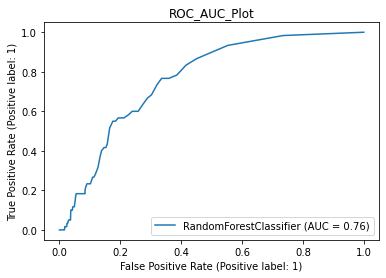

{'Accuracy': 0.91,
 'Precision': 0.13,
 'Recall': 0.1,
 'F1 score': 0.11,
 'ROC_AUC_Score': 0.53}

In [39]:
# Random forest classifier
RF_estimator= RandomForestClassifier(random_state=1)
RF_metrics = models(RF_estimator,X_train_smote, y_train_smote)
RF_metrics

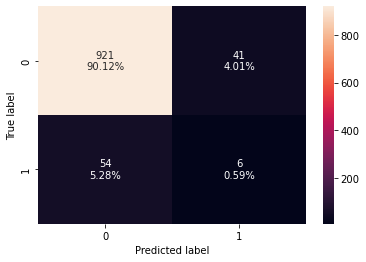

In [40]:
Rf_confusion_metrics = confusion_mat(RF_estimator)
Rf_confusion_metrics

#### Observations:

* The model achieves an accuracy of 91%. This indicates that the overall classification performance is relatively high.
* The model achieves a ROC_AUC 54% score, indicating that the models ability to discriminate between positive and negative cases is close to a random chance. This can be improved.
* The F1 score is 13%, this isn't a good score. We will tune the models parameter to see if we can achieve a better score.
* The confusion matrix shows our model is only able to identify 5 true positive cases. 


#### DecisionTree Classifier

Accuracy: 87.18%
Precision: 14.85%
Recall: 25.00%
F1: 18.63%
ROC_AUC_score: 58.03%


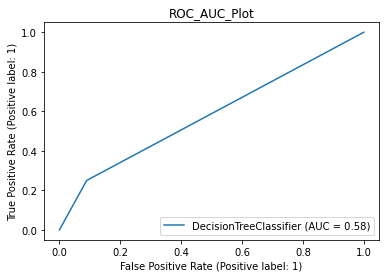

{'Accuracy': 0.87,
 'Precision': 0.15,
 'Recall': 0.25,
 'F1 score': 0.19,
 'ROC_AUC_Score': 0.58}

In [41]:
DC_estimator = DecisionTreeClassifier(random_state=1)
DC_metrics = models(DC_estimator,X_train_smote, y_train_smote)
DC_metrics

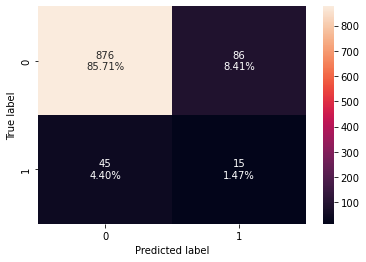

In [42]:
DC_confusion_metrics = confusion_mat(DC_estimator)
DC_confusion_metrics

#### Observations:
* The model achieves an accuracy of approximately 86.59%, which is lower than the previous model, but still fair.
* The ROC_AUC score is still within the range of RandomForest ROC score
* The model achieves a 17.96% F1 score, Identifying 15 TP cases, shown by the confusion metrics. This makes it relatively better than the RandomForest model. However, this can be improved upon to see if we would get even better scores


#### KNeighbors Classifiers

Accuracy: 78.77%
Precision: 13.15%
Recall: 46.67%
F1: 20.51%
ROC_AUC_score: 63.72%


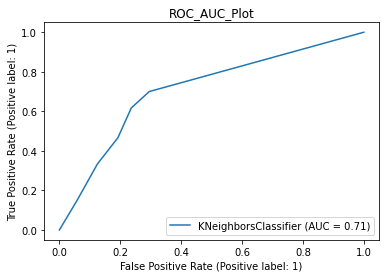

{'Accuracy': 0.79,
 'Precision': 0.13,
 'Recall': 0.47,
 'F1 score': 0.21,
 'ROC_AUC_Score': 0.64}

In [43]:
KN_estimator = KNeighborsClassifier()
KN_metrics = models(KN_estimator,X_train_smote, y_train_smote)
KN_metrics

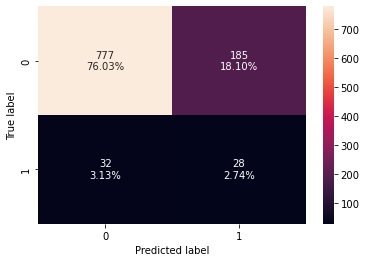

In [44]:
KN_confusion_metrics = confusion_mat(KN_estimator)
KN_confusion_metrics

#### Observation:
* This model achieves a lower accuracy score(79.65%) compared to the previous models.
* The ROC score is better in this model, with a score of 23.53%.
* The model achieves the highest recall score so far(67.31%), indicating the ability to identify true positive cases. This isn't exactly a good score.
* It achieves an F1 score of 23.53%, making the DecisionTree model a better choice for us so far. 
* The confusion metrics shows the model only identified 32 TPs.


#### AdaBoost Classifier

Accuracy: 84.93%
Precision: 15.94%
Recall: 36.67%
F1: 22.22%
ROC_AUC_score: 62.30%


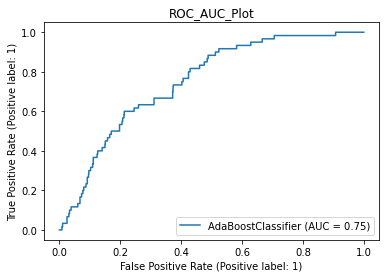

{'Accuracy': 0.85,
 'Precision': 0.16,
 'Recall': 0.37,
 'F1 score': 0.22,
 'ROC_AUC_Score': 0.62}

In [45]:
AB_estimator = AdaBoostClassifier(random_state= 1)
AB_metrics = models(AB_estimator, X_train_smote, y_train_smote)
AB_metrics

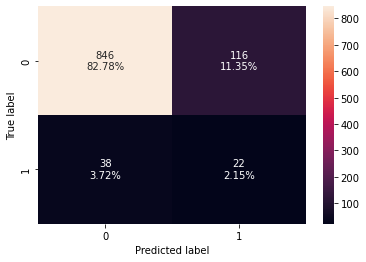

In [46]:
AB_confusion_metrics = confusion_mat(AB_estimator)
AB_confusion_metrics

#### Observation:
* Compared to the KNeighbors model, this models performance is poor. Excluding the accuracy score at 85.5% and the rest of the scores doesn't give a better record.

#### 4.2.5 XGBOOST Classifier

Accuracy: 89.92%
Precision: 13.56%
Recall: 13.33%
F1: 13.45%
ROC_AUC_score: 54.02%


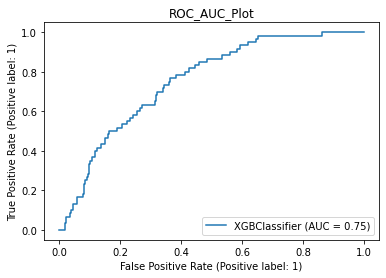

{'Accuracy': 0.9,
 'Precision': 0.14,
 'Recall': 0.13,
 'F1 score': 0.13,
 'ROC_AUC_Score': 0.54}

In [47]:
XGB_estimator = XGBClassifier(random_state=1)
XGB_metrics = models(XGB_estimator, X_train_smote, y_train_smote)
XGB_metrics

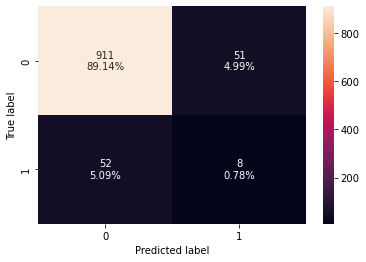

In [48]:
XGB_confusion_metrics= confusion_mat(XGB_estimator)
XGB_confusion_metrics

#### Observations
* Just like the Adaboost model, this model performs poorly compared to the KNeighbors model. However, it has a better accuracy score. Remember, we are focused on the F1 score.

#### Observations
* Just like the Adaboost model, this model performs poorly compared to the KNeighbors model. However, it has a better accuracy score. Remember, we are focused on the F1 score.




### 4.2.2 Undersampling:

This technique helps us reduce the negative cases to ensure a balanced training data set. It randomly selects an equal number of negative cases to match the number of positive cases. 

#### Resampling the training data using the RandomUnderSampler function

In [49]:
#Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(x_train, y_train)

# Confirming the distibution those with stroke and those without stroke
Y_count = y_train_under.value_counts().rename({1: 'Has stroke', 0: 'Stable'})
Y_count

Stable        189
Has stroke    189
Name: stroke, dtype: int64

#### Observations:
 * We have been able to reduce the number of negative cases to equal our positive cases, thus making the training dataset balance.
 
### Training the Models
#### RandomForest Classifier

Accuracy: 71.72%
Precision: 15.62%
Recall: 86.67%
F1: 26.46%
ROC_AUC_score: 78.73%


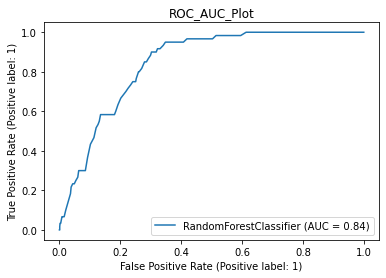

{'Accuracy': 0.72,
 'Precision': 0.16,
 'Recall': 0.87,
 'F1 score': 0.26,
 'ROC_AUC_Score': 0.79}

In [50]:
# Random forest classifier
RF_estimator_under= RandomForestClassifier(random_state=1)
RF_metrics_under = models(RF_estimator_under, X_train_under, y_train_under)
RF_metrics_under

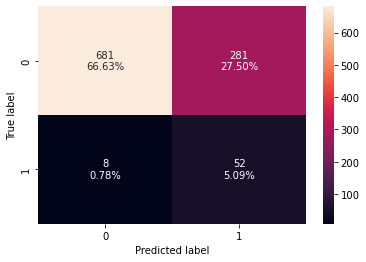

In [51]:
Rf_under_metrics = confusion_mat(RF_estimator_under)
Rf_under_metrics

#### Observations:
* The model has a low accuracy score compared to that of the oversample RF model.
* The model a good increase in the recall score(87%), showing that the model is able to identify more TP cases(52). However, the models precision is poor. 
* The ROC score has also increased significantly, showing that the model is able to distinguish between positive and negative cases.


#### DecisionTree Classifier

Accuracy: 66.93%
Precision: 11.39%
Recall: 68.33%
F1: 19.52%
ROC_AUC_score: 67.59%


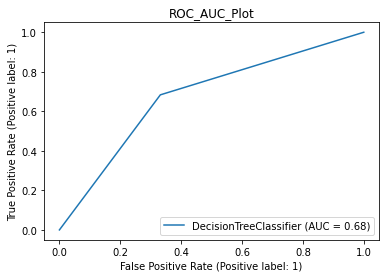

{'Accuracy': 0.67,
 'Precision': 0.11,
 'Recall': 0.68,
 'F1 score': 0.2,
 'ROC_AUC_Score': 0.68}

In [52]:
DC_estimator_under = DecisionTreeClassifier(random_state=1)
DC_metrics_under = models(DC_estimator_under, X_train_under, y_train_under)
DC_metrics_under

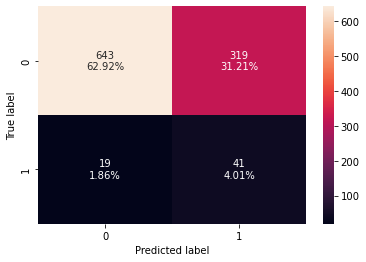

In [53]:
DC_confusion_under = confusion_mat(DC_estimator_under)
DC_confusion_under

#### Observations
* Just paying attention to the F1_score, this model behaves better than the DecisionTree model of the oversample sets. However, the accuracy is poor in comparison.
* The recall score also performs better, at 68.33% and 67.59% respectively.

#### KNeighbors Classifier

Accuracy: 68.59%
Precision: 13.85%
Recall: 83.33%
F1: 23.75%
ROC_AUC_score: 75.50%


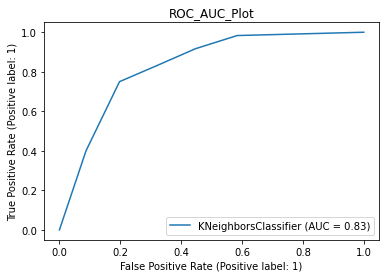

{'Accuracy': 0.69,
 'Precision': 0.14,
 'Recall': 0.83,
 'F1 score': 0.24,
 'ROC_AUC_Score': 0.76}

In [54]:
KN_estimator_under = KNeighborsClassifier()
KN_metrics_under = models(KN_estimator_under,X_train_under, y_train_under)
KN_metrics_under

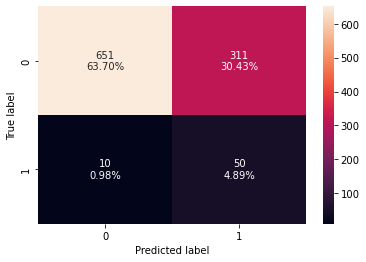

In [55]:
KN_confusion_under = confusion_mat(KN_estimator_under)
KN_confusion_under

#### Observations:
* The F1 score in this model is relatively similar with the score in the in oversample sets.
* There is however a better ROC and Recall score, albeit, a poor accuracy score.

#### AdaBoostClassifier 

Accuracy: 69.57%
Precision: 14.25%
Recall: 83.33%
F1: 24.33%
ROC_AUC_score: 76.02%


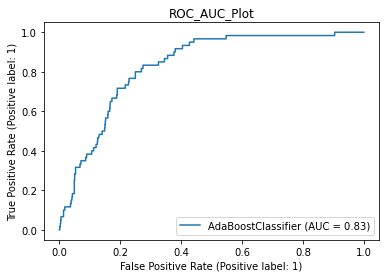

{'Accuracy': 0.7,
 'Precision': 0.14,
 'Recall': 0.83,
 'F1 score': 0.24,
 'ROC_AUC_Score': 0.76}

In [56]:
AB_estimator_under = AdaBoostClassifier(random_state= 1)
AB_metrics_under = models(AB_estimator_under,X_train_under, y_train_under)
AB_metrics_under

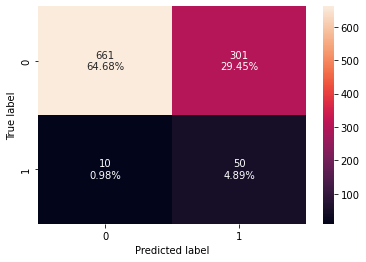

In [57]:
AB_confusion_under = confusion_mat(AB_estimator_under)
AB_confusion_under

#### Observations:
* This model achieves a better F1 score(24.33%) compared to the oversampling set
* Same with most of the models in the undersampling set, the accuracy of the model dropped. 
* The Recall and ROC score also saw a significant increase, 83.33% and 76.02% respectively.

#### XGBoost Classifier

Accuracy: 71.62%
Precision: 15.57%
Recall: 86.67%
F1: 26.40%
ROC_AUC_score: 78.68%


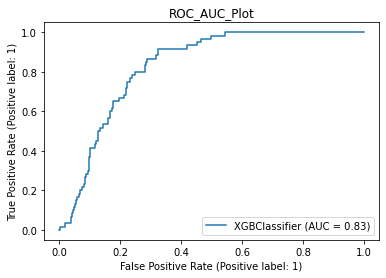

{'Accuracy': 0.72,
 'Precision': 0.16,
 'Recall': 0.87,
 'F1 score': 0.26,
 'ROC_AUC_Score': 0.79}

In [58]:
XGB_estimator_under = XGBClassifier(random_state=1)
XGB_metrics_under = models(XGB_estimator_under,X_train_under, y_train_under)
XGB_metrics_under 

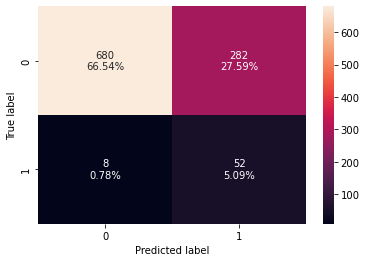

In [59]:
XGB_confusion_under = confusion_mat(XGB_estimator_under)
XGB_confusion_under

#### Observations:
* The model achieves a better F1_score (26%) than the oversampling set.
* The accuracy score also dropped from over 90% to 72%.
* Like every other model in this set, the Recall and ROC score performed better, at 87% and 79% respectively.


### 4.3 Hyperparameter tuning

So far, the **undersampling** models have outperfomed the undersampling dataset. Albeit we ahaven't performed well in achieving a good F1 score. However, given the imbalanced datasets, we we would have to manage our expectations of the models.

In this section, we would tune the hyperparameters of each of the classifiers using the undersample train datasets to improve the results. To achieve this, we would use the GridSearchCV technique.

#### RandomForestClassifier  parameter Tuning

In [60]:
#Choose the type of classifier. 
Rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [5,10,15],
    'max_features': [2, 5],
    'min_samples_split':[5, 7],
    'max_features': ['auto', 'sqrt'],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(Rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_under, y_train_under)

# Set the clf to the best combination of parameters
Rf_estimator_tuned = grid_obj.best_estimator_

Rf_estimator_tuned

RandomForestClassifier(min_samples_split=7, n_estimators=15, random_state=1)

Accuracy: 69.67%
Precision: 15.08%
Recall: 90.00%
F1: 25.84%
ROC_AUC_score: 79.20%


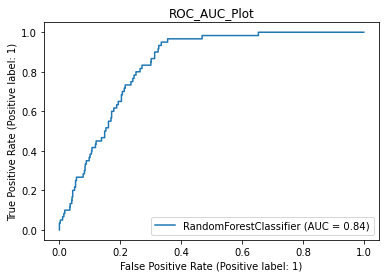

{'Accuracy': 0.7,
 'Precision': 0.15,
 'Recall': 0.9,
 'F1 score': 0.26,
 'ROC_AUC_Score': 0.79}

In [61]:
Rf_tuned_metrics = models(Rf_estimator_tuned, X_train_under, y_train_under)
Rf_tuned_metrics

#### Observations:
* The model produces relative scores to the undersampling set, very slight increase in all the scores after tunning. 

#### DecisionTree parameter tuning

In [62]:
#Tuning the Decision tree classifier model

#Choose the type of classifier. 
DC_estimator_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
DC_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(DC_estimator_tuned, DC_parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_under, y_train_under)

# Set the clf to the best combination of parameters
DC_estimator_tuned = grid_obj.best_estimator_

DC_estimator_tuned

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=10,
                       random_state=1)

Accuracy: 71.43%
Precision: 14.20%
Recall: 76.67%
F1: 23.96%
ROC_AUC_score: 73.88%


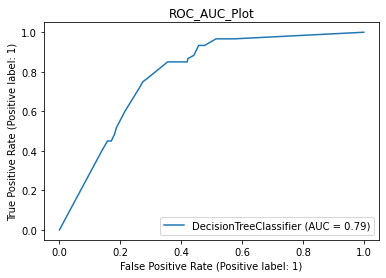

{'Accuracy': 0.71,
 'Precision': 0.14,
 'Recall': 0.77,
 'F1 score': 0.24,
 'ROC_AUC_Score': 0.74}

In [63]:
DC_tuned_metrics = models(DC_estimator_tuned, X_train_under, y_train_under)
DC_tuned_metrics

#### Observations:
* This model acheives slightly better scores compared to the undersampling data set. With the F1 score at 23.96% from 19.52%

#### KNeighbors parameter tuning

In [64]:
#Choose the type of classifier. 
KN_estimator_tuned = KNeighborsClassifier()

# Grid of parameters to choose from
KN_parameters = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50],
    'p': [1, 2]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(KN_estimator_tuned, KN_parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_under, y_train_under)

# Set the clf to the best combination of parameters
KN_estimator_tuned = grid_obj.best_estimator_

KN_estimator_tuned

KNeighborsClassifier(n_neighbors=7, weights='distance')

Accuracy: 69.67%
Precision: 14.49%
Recall: 85.00%
F1: 24.76%
ROC_AUC_score: 76.86%


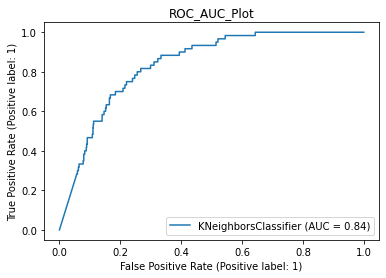

{'Accuracy': 0.7,
 'Precision': 0.14,
 'Recall': 0.85,
 'F1 score': 0.25,
 'ROC_AUC_Score': 0.77}

In [65]:
KN_tuned_metrics = models(KN_estimator_tuned, X_train_under, y_train_under)
KN_tuned_metrics

#### Observations
* Just like most models in our tuned sets, this model achieve just a slight increase in the scores percentages.

#### AdaBoost parameter tuning

In [66]:
#Tuning the AdaBoost classifier model

#Choose the type of classifier. 
AB_estimator_tuned = AdaBoostClassifier(random_state= 1)

# Grid of parameters to choose from
## add from article
AB_parameters = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(AB_estimator_tuned, AB_parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_under, y_train_under)

# Set the clf to the best combination of parameters
AB_estimator_tuned = grid_obj.best_estimator_

AB_estimator_tuned

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=200, random_state=1)

Accuracy: 67.42%
Precision: 14.36%
Recall: 91.67%
F1: 24.83%
ROC_AUC_score: 78.79%


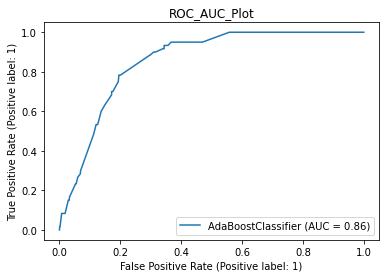

{'Accuracy': 0.67,
 'Precision': 0.14,
 'Recall': 0.92,
 'F1 score': 0.25,
 'ROC_AUC_Score': 0.79}

In [67]:
AB_tuned_metrics = models(AB_estimator_tuned, X_train_under, y_train_under)
AB_tuned_metrics

#### Observations:
* The model achieves relatively similar scores as the undersampling model .


#### XGBClassifier parameter tuning

In [68]:
#Choose the type of classifier. 
XGB_estimator_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
XGB_parameters = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'reg_lambda': [0.1, 0.5],
    'gamma': [0.1, 0.5]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(XGB_estimator_tuned, XGB_parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_under, y_train_under)

# Set the clf to the best combination of parameters
XGB_estimator_tuned = grid_obj.best_estimator_

XGB_estimator_tuned

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

Accuracy: 71.23%
Precision: 15.18%
Recall: 85.00%
F1: 25.76%
ROC_AUC_score: 77.69%


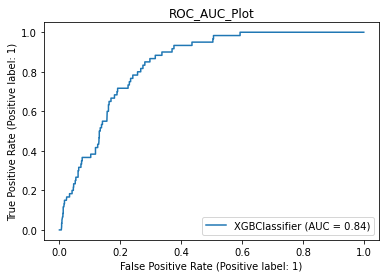

{'Accuracy': 0.71,
 'Precision': 0.15,
 'Recall': 0.85,
 'F1 score': 0.26,
 'ROC_AUC_Score': 0.78}

In [69]:
XGB_tuned_metrics = models(XGB_estimator_tuned, X_train_under, y_train_under)
XGB_tuned_metrics

#### Observations:
* The models follows similar pattern as most models in the tunded sets, however, the F1 score dropped slightly here, from 26.48% to 25.76%.

In [70]:
#Creating a table to show all the classifiers 

A = [RF_metrics, RF_metrics_under, Rf_tuned_metrics, DC_metrics, DC_metrics_under, DC_tuned_metrics, 
    KN_metrics, KN_metrics_under, KN_tuned_metrics, AB_metrics, AB_metrics_under, AB_tuned_metrics, 
     XGB_metrics, XGB_metrics_under,XGB_tuned_metrics]

Name = ['Rf_metrics', 'RF_metrics_under','Rf_tuned_metrics','DC_metrics','DC_metrics_under','DC_tuned_metrics'
       'KN_metrics', 'KN_metrics_under', 'KN_tuned_metrics', 'AB_metrics', 'AB_metrics_under', 'AB_tuned_metrics',
        'XGB_metrics', 'XGB_metrics_under','XGB_tuned_metrics']
List = []
for name, metrics in zip(Name, A):
    accuracy = metrics['Accuracy']* 100
    precision = metrics['Precision']* 100
    recall = metrics['Recall']* 100
    F1_score = metrics['F1 score']* 100
    Roc_score = metrics['ROC_AUC_Score']*100
    
    #Appending the results to a list
    List.append({'Classifier': name,
                 'Accuracy(%)': accuracy,
                 'Precision(%)': precision,
                 'Recall(%)': recall,
                'F1_score(%)': F1_score,
                'ROC_score(%)':Roc_score})

#Creating a dataframe for the list
List = pd.DataFrame(List).set_index('Classifier')
List

,Accuracy(%),Precision(%),Recall(%),F1_score(%),ROC_score(%)
Classifier,,,,,
Rf_metrics,91.0,13.0,10.0,11.0,53.0
RF_metrics_under,72.0,16.0,87.0,26.0,79.0
Rf_tuned_metrics,70.0,15.0,90.0,26.0,79.0
DC_metrics,87.0,15.0,25.0,19.0,58.0
DC_metrics_under,67.0,11.0,68.0,20.0,68.0
DC_tuned_metricsKN_metrics,71.0,14.0,77.0,24.0,74.0
KN_metrics_under,79.0,13.0,47.0,21.0,64.0
KN_tuned_metrics,69.0,14.0,83.0,24.0,76.0
AB_metrics,70.0,14.0,85.0,25.0,77.0


So far, the XGB_tuned_metrics model and the RF_metrics_under has produced a better F1 score (26%), and better results compared to the rest of the models. Hence they are a better fit for our analysis. That said, we would be working with XGB_tuned_metrics model instead, as the XGBoost classifier is a better model for unbalanced datasets than the RandomForest model.


These scores are poor and more data would be required to achieve a better prediction. 

#### 4.3.1 Identifying important metrics

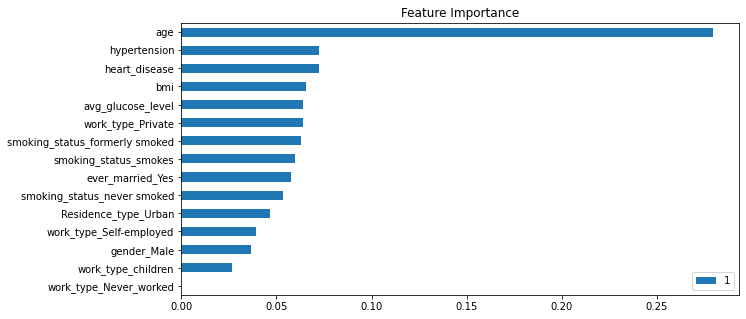

In [71]:
#Identifying the important features
importance = XGB_estimator_tuned.feature_importances_

feature_importance = dict(zip(X_train_under.columns, importance))

#Putting the important features in a data frame
feature_importance = pd.DataFrame(feature_importance, index=[1])

#Transposing and sorting the features
feature_importance =feature_importance.transpose()
feature_importance =feature_importance.sort_values(by = 1, ascending= True)

#Visualizing the features
feature_importance.plot.barh(title="Feature Importance",figsize=(10,5));




#### Observation

The patients age, prevailing illness, body max index, and glucose level are considered very important metrics among others, to determine whether or not a patient has stroke.


## Summary

* From the analysis, the dataset has a high level of inbalance, affecting the ability for the model to return better  F1 score(26%). Building a better model would require more data (preferably, one relatively balanced)
* There are a lot of missing data in the BMI column.
* There are outliers present in both the BMI data, and th average glucose level data.
* Age shows a much stronger correlation to the target, followed by prevailing illness(heart_disease and hypertension). It is safe to say that elderly patients with these deases have a high likelihood of having stroke.



## The END